### Code

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,164,771 (8.26 MB)

 Trainable params: 2,164,771 (8.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.3878 - loss: 1.1514
Epoch 1: val_accuracy improved from -inf to 0.63333, saving model to saved_models/best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.3903 - loss: 1.1455 - val_accuracy: 0.6333 - val_loss: 0.7230 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.6741 - loss: 0.6133
Epoch 2: val_accuracy improved from 0.63333 to 0.70000, saving model to saved_models/best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.6746 - loss: 0.6115 - val_accuracy: 0.7000 - val_loss: 0.4555 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6843 - loss: 0.5512
Epoch 3: val_accuracy improved from 0.70000 to 0.78333, saving model to saved_models/best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.6852 - loss: 0.5503 - val_accuracy: 0.7833 - val_loss: 0.4629 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━

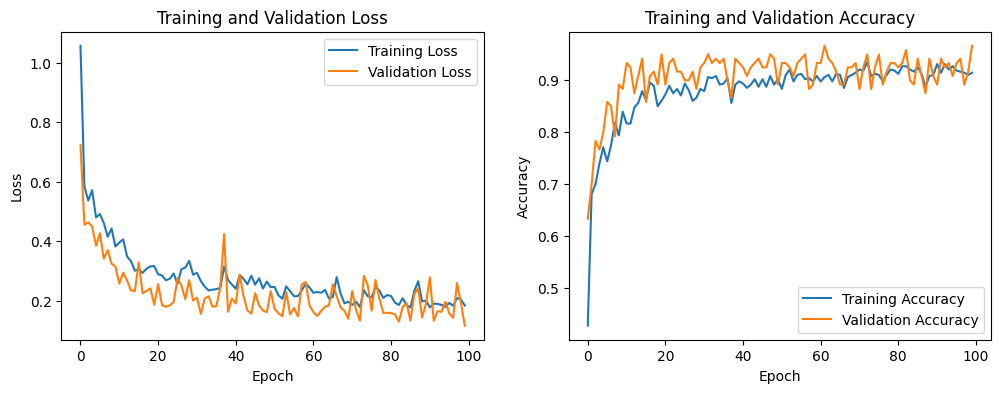

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


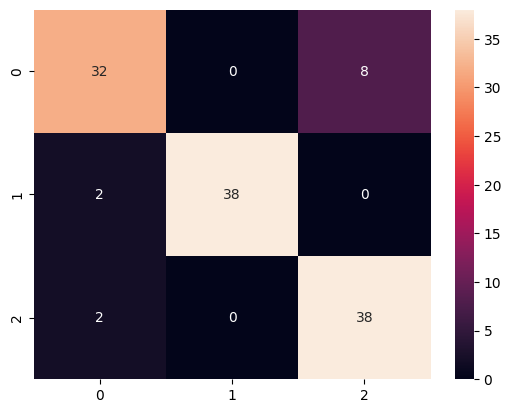

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
from concurrent.futures import ThreadPoolExecutor
import random

# Set random seeds for reproducibility
RANDOM_SEED = 1024
EPOCHS = 100

# Set up the directories
train_dir = "../Images_data/training_test_reduced/training_set"
test_dir = "../Images_data/training_test_reduced/test_set"

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Setting aside 20% of training data for validation
)

# Data normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    seed=RANDOM_SEED,
    subset='training'  # Use training subset
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    seed=RANDOM_SEED,
    subset='validation'  # Use validation subset
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    seed=RANDOM_SEED,
    shuffle=False  # No shuffling to maintain order for evaluation
)

# Define the model
drop = 0.25
#kernel_initializer = 'he_uniform'  # Using he uniform initializer
kernel_initializer = 'glorot_uniform'  # Using glorot uniform initializer

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(drop),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(drop),

    Flatten(),
    Dense(512, activation='relu', kernel_initializer=kernel_initializer),
    Dropout(drop),
    Dense(3, activation='softmax')
])

opt = Adam(use_ema=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Callbacks
checkpoint = ModelCheckpoint('saved_models/best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('saved_logs/my_logs.csv', separator=',', append=False)

def scheduler(epoch, lr):
    if epoch < int(0.3 * epoch):
        return lr
    else:
        return lr

callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

# Evaluate the model on the test dataset
_, test_acc = model.evaluate(test_generator)
print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)

# Predicting the Test set results
y_pred_test = model.predict(test_generator)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = test_generator.classes

# Parallelizing confusion matrix computation using ThreadPoolExecutor
def compute_confusion_matrix(ground_truth, prediction_test):
    return confusion_matrix(ground_truth, prediction_test)

with ThreadPoolExecutor() as executor:
    cm = executor.submit(compute_confusion_matrix, ground_truth, prediction_test).result()

sns.heatmap(cm, annot=True)
plt.show()


### Code + Cross-Validation

Found 120 images belonging to 3 classes.


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3226 - loss: 7.0358
Epoch 1: val_accuracy improved from -inf to 0.44167, saving model to saved_models/best_model_fold.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.3224 - loss: 6.8658 - val_accuracy: 0.4417 - val_loss: 1.0619 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3514 - loss: 1.0778
Epoch 2: val_accuracy improved from 0.44167 to 0.62500, saving model to saved_models/best_model_fold.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3531 - loss: 1.0766 - val_accuracy: 0.6250 - val_loss: 0.9919 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5899 - loss: 0.8531
Epoch 3: val_accuracy improved from 0.62500 to 0.79167, saving model to saved_models/best_model_fold.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5913 - loss: 0.8467 - val_accuracy: 0.7917 - val_loss: 0.4576 - learning_rate: 0.0010
Epoch 4/100
14

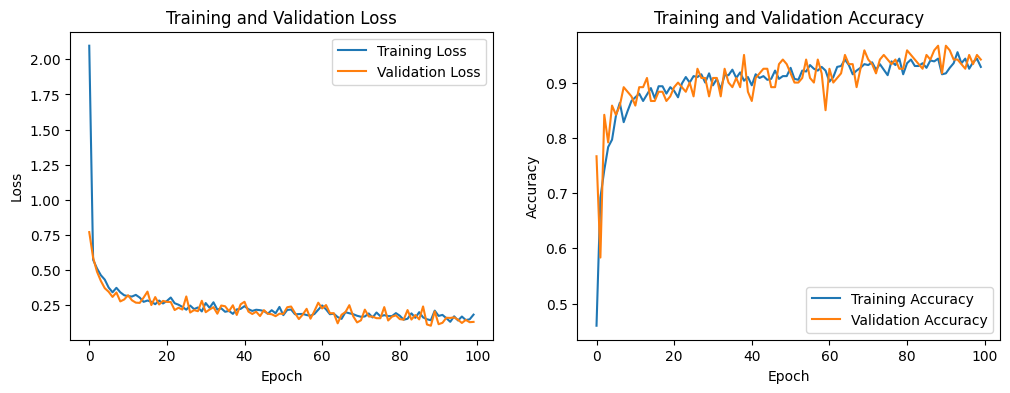

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000203826662A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step


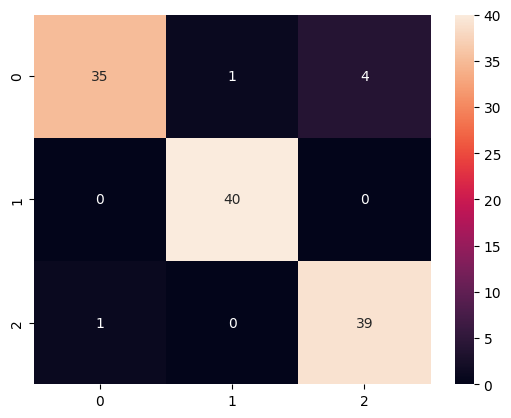

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import math
from concurrent.futures import ThreadPoolExecutor
import random
import os

# Set random seeds for reproducibility
EPOCHS = 100
RANDOM_SEED = 1024

# Set up the directories
train_dir = "../Images_data/training_test_reduced/training_set"
test_dir = "../Images_data/training_test_reduced/test_set"

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    seed=RANDOM_SEED,
    shuffle=False  # No shuffling to maintain order for evaluation
)

# Define the model architecture
def create_model():
    drop = 0.25
    kernel_initializer = 'he_uniform'
    #kernel_initializer = 'glorot_uniform'  # Using glorot uniform initializer
    
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(drop),
    
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(drop),
    
        Flatten(),
        Dense(512, activation='relu', kernel_initializer=kernel_initializer),
        Dropout(drop),
        Dense(3, activation='softmax')
    ])
    
    opt = Adam(use_ema=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < int(0.3 * epoch):
        return lr
    else:
        return lr # * np.exp(-1)

# Function to load images and labels into numpy arrays
def load_data(image_paths, labels, target_size):
    data = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
    return np.array(data), to_categorical(np.array(labels), num_classes=3)

# Cross-validation settings
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=RANDOM_SEED)

# Get the list of all images and labels in the training directory
image_paths = []
labels = []
classes = sorted(os.listdir(train_dir))
class_indices = {cls: idx for idx, cls in enumerate(classes)}

for cls in classes:
    cls_dir = os.path.join(train_dir, cls)
    if os.path.isdir(cls_dir):
        for img in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img)
            image_paths.append(img_path)
            labels.append(class_indices[cls])

image_paths = np.array(image_paths)
labels = np.array(labels)

# Cross-validation loop
cv_scores = []

for train_index, val_index in kf.split(image_paths):
    train_data_paths = image_paths[train_index]
    train_labels = labels[train_index]
    val_data_paths = image_paths[val_index]
    val_labels = labels[val_index]
    
    # Load data for the current fold
    train_data, train_labels = load_data(train_data_paths, train_labels, target_size=(32, 32))
    val_data, val_labels = load_data(val_data_paths, val_labels, target_size=(32, 32))
    
    # Create ImageDataGenerators for the current fold
    train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, seed=RANDOM_SEED)
    validation_generator = train_datagen.flow(val_data, val_labels, batch_size=32, seed=RANDOM_SEED)
    
    # Create and train the model
    model = create_model()
    
    checkpoint = ModelCheckpoint('saved_models/best_model_fold.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    log_csv = CSVLogger(f'saved_logs/my_logs_fold.csv', separator=',', append=False)
    callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]
    
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=callbacks_list
    )
    
    # Evaluate the model on the validation data
    _, val_acc = model.evaluate(validation_generator)
    cv_scores.append(val_acc)


# Train final model on all training data and evaluate on test data
train_data, train_labels = load_data(image_paths, labels, target_size=(32, 32))
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, seed=RANDOM_SEED)

model = create_model()
checkpoint = ModelCheckpoint('saved_models/best_model_final.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('saved_logs/my_logs_final.csv', separator=',', append=False)
callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

_, test_acc = model.evaluate(test_generator)
print(f"Accuracy on the test dataset: {test_acc * 100:.2f}%")

# Calculate average validation accuracy
avg_val_acc = np.mean(cv_scores)
print(f"Cross-Validation accuracy: {cv_scores}")
print(f"Average validation accuracy: {avg_val_acc * 100:.2f}%")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)

# Predicting the Test set results
y_pred_test = model.predict(test_generator)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = test_generator.classes

# Parallelizing confusion matrix computation using ThreadPoolExecutor
def compute_confusion_matrix(ground_truth, prediction_test):
    return confusion_matrix(ground_truth, prediction_test)

with ThreadPoolExecutor() as executor:
    cm = executor.submit(compute_confusion_matrix, ground_truth, prediction_test).result()

sns.heatmap(cm, annot=True)
plt.show()

### Code + CV + ROC-AUC

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import math
from concurrent.futures import ThreadPoolExecutor
import random
import os

# Set random seeds for reproducibility
EPOCHS = 1
RANDOM_SEED = 1024

# Set up the directories
train_dir = "../Images_data/training_test_reduced/training_set"
test_dir = "../Images_data/training_test_reduced/test_set"

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    seed=RANDOM_SEED,
    shuffle=False  # No shuffling to maintain order for evaluation
)

# Define the model architecture
def create_model():
    drop = 0.25
    kernel_initializer = 'he_uniform'
    
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(drop),
    
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(drop),
    
        Flatten(),
        Dense(512, activation='relu', kernel_initializer=kernel_initializer),
        Dropout(drop),
        Dense(3, activation='softmax')
    ])
    
    opt = Adam(use_ema=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < int(0.3 * epoch):
        return lr
    else:
        return lr # * np.exp(-1)

# Function to load images and labels into numpy arrays
def load_data(image_paths, labels, target_size):
    data = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
    return np.array(data), to_categorical(np.array(labels), num_classes=3)

# Cross-validation settings
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=RANDOM_SEED)

# Get the list of all images and labels in the training directory
image_paths = []
labels = []
classes = sorted(os.listdir(train_dir))
class_indices = {cls: idx for idx, cls in enumerate(classes)}

for cls in classes:
    cls_dir = os.path.join(train_dir, cls)
    if os.path.isdir(cls_dir):
        for img in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img)
            image_paths.append(img_path)
            labels.append(class_indices[cls])

image_paths = np.array(image_paths)
labels = np.array(labels)

# Cross-validation loop
cv_scores = []

for train_index, val_index in kf.split(image_paths):
    train_data_paths = image_paths[train_index]
    train_labels = labels[train_index]
    val_data_paths = image_paths[val_index]
    val_labels = labels[val_index]
    
    # Load data for the current fold
    train_data, train_labels = load_data(train_data_paths, train_labels, target_size=(32, 32))
    val_data, val_labels = load_data(val_data_paths, val_labels, target_size=(32, 32))
    
    # Create ImageDataGenerators for the current fold
    train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, seed=RANDOM_SEED)
    validation_generator = train_datagen.flow(val_data, val_labels, batch_size=32, seed=RANDOM_SEED)
    
    # Create and train the model
    model = create_model()
    
    checkpoint = ModelCheckpoint('saved_models/best_model_fold.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    log_csv = CSVLogger(f'saved_logs/my_logs_fold.csv', separator=',', append=False)
    callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]
    
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=callbacks_list
    )
    
    # Evaluate the model on the validation data
    _, val_acc = model.evaluate(validation_generator)
    cv_scores.append(val_acc)


# Train final model on all training data and evaluate on test data
train_data, train_labels = load_data(image_paths, labels, target_size=(32, 32))
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, seed=RANDOM_SEED)

model = create_model()
checkpoint = ModelCheckpoint('saved_models/best_model_final.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('saved_logs/my_logs_final.csv', separator=',', append=False)
callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

_, test_acc = model.evaluate(test_generator)
print(f"Accuracy on the test dataset: {test_acc * 100:.2f}%")

# Calculate average validation accuracy
avg_val_acc = np.mean(cv_scores)
print(f"Cross-Validation accuracy: {cv_scores}")
print(f"Average validation accuracy: {avg_val_acc * 100:.2f}%")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)

# Predicting the Test set results
y_pred_test = model.predict(test_generator)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = test_generator.classes

# Parallelizing confusion matrix computation using ThreadPoolExecutor
def compute_confusion_matrix(ground_truth, prediction_test):
    return confusion_matrix(ground_truth, prediction_test)

with ThreadPoolExecutor() as executor:
    cm = executor.submit(compute_confusion_matrix, ground_truth, prediction_test).result()

sns.heatmap(cm, annot=True)
plt.show()

# Compute ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(ground_truth, y_pred_test[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### HPC Version

Found 120 images belonging to 3 classes.


c:\venv\ilumpy-VS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.3438 - loss: 1.5475

c:\venv\ilumpy-VS\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3432 - loss: 4.4281
Epoch 1: val_accuracy improved from -inf to 0.44167, saving model to saved_models/best_model_fold.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.3451 - loss: 4.2116 - val_accuracy: 0.4417 - val_loss: 1.0839 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3914 - loss: 1.0759
Epoch 2: val_accuracy improved from 0.44167 to 0.69167, saving model to saved_models/best_model_fold.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3941 - loss: 1.0739 - val_accuracy: 0.6917 - val_loss: 0.8963 - learning_rate: 0.0010
Epoch 3/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6301 - loss: 0.7559
Epoch 3: val_accuracy improved from 0.69167 to 0.71667, saving model to saved_models/best_model_fold.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6334 - loss: 0.7444 - val_accuracy: 0.7167 - val_loss: 0.5876 - learning_rate: 0.0010
Epoch 4/100
15/1

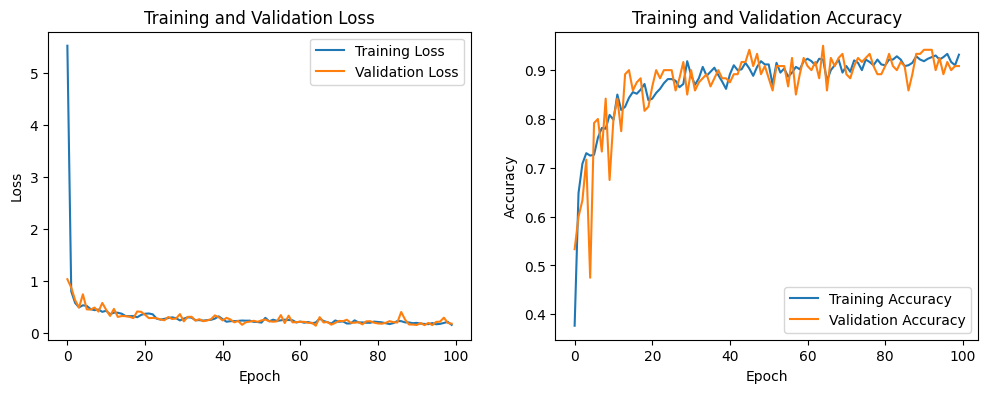

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


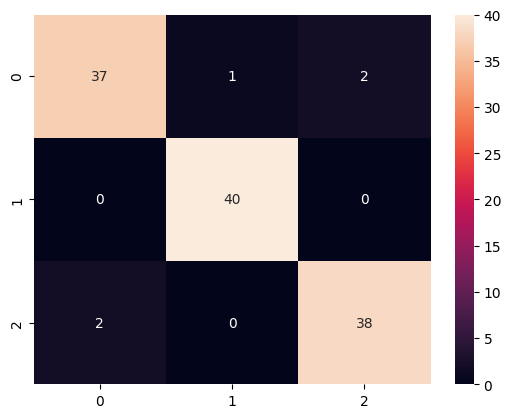

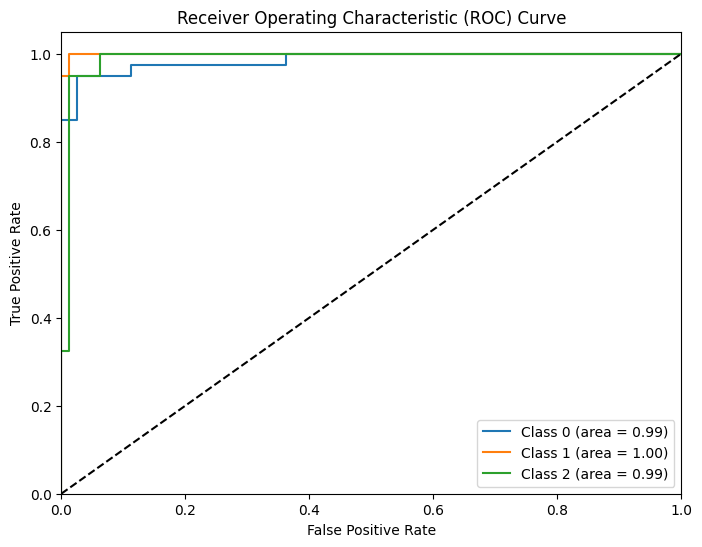

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import math
from concurrent.futures import ThreadPoolExecutor
import random
import os
import logging

# Set random seeds for reproducibility
EPOCHS = 100
RANDOM_SEED = 1024

# Hyperparameters
drop = 0.25
kernel_initializer = 'he_uniform'
optimizer = 'Adam'

# Set up the directories
train_dir = "../Images_data/training_test_reduced/training_set"
test_dir = "../Images_data/training_test_reduced/test_set"

# Set up logging
logging.basicConfig(filename='training_log.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Save hyperparameters
with open('hyperparameters.txt', 'w') as f:
    f.write(f"Epochs: {EPOCHS}\n")
    f.write(f"Optimizer: {optimizer}\n")
    f.write(f"Kernel Initializer: {kernel_initializer}\n")
    f.write(f"Dropout: {drop}\n")

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    seed=RANDOM_SEED,
    shuffle=False  # No shuffling to maintain order for evaluation
)

# Define the model architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(drop),
    
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(drop),
    
        Flatten(),
        Dense(512, activation='relu', kernel_initializer=kernel_initializer),
        Dropout(drop),
        Dense(3, activation='softmax')
    ])
    
    opt = Adam(use_ema=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < int(0.3 * epoch):
        return lr
    else:
        return lr # * np.exp(-1)

# Function to load images and labels into numpy arrays
def load_data(image_paths, labels, target_size):
    data = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
    return np.array(data), to_categorical(np.array(labels), num_classes=3)

# Cross-validation settings
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=RANDOM_SEED)

# Get the list of all images and labels in the training directory
image_paths = []
labels = []
classes = sorted(os.listdir(train_dir))
class_indices = {cls: idx for idx, cls in enumerate(classes)}

for cls in classes:
    cls_dir = os.path.join(train_dir, cls)
    if os.path.isdir(cls_dir):
        for img in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img)
            image_paths.append(img_path)
            labels.append(class_indices[cls])

image_paths = np.array(image_paths)
labels = np.array(labels)

# Cross-validation loop
cv_scores = []

for train_index, val_index in kf.split(image_paths):
    train_data_paths = image_paths[train_index]
    train_labels = labels[train_index]
    val_data_paths = image_paths[val_index]
    val_labels = labels[val_index]
    
    # Load data for the current fold
    train_data, train_labels = load_data(train_data_paths, train_labels, target_size=(32, 32))
    val_data, val_labels = load_data(val_data_paths, val_labels, target_size=(32, 32))
    
    # Create ImageDataGenerators for the current fold
    train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, seed=RANDOM_SEED)
    validation_generator = train_datagen.flow(val_data, val_labels, batch_size=32, seed=RANDOM_SEED)
    
    # Create and train the model
    model = create_model()
    
    checkpoint = ModelCheckpoint('saved_models/best_model_fold.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    log_csv = CSVLogger(f'saved_logs/my_logs_fold.csv', separator=',', append=False)
    callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]
    
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=callbacks_list
    )
    
    # Evaluate the model on the validation data
    _, val_acc = model.evaluate(validation_generator)
    cv_scores.append(val_acc)

# Train final model on all training data and evaluate on test data
train_data, train_labels = load_data(image_paths, labels, target_size=(32, 32))
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, seed=RANDOM_SEED)

model = create_model()
checkpoint = ModelCheckpoint('saved_models/best_model_final.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('saved_logs/my_logs_final.csv', separator=',', append=False)
callbacks_list = [checkpoint, log_csv, LearningRateScheduler(scheduler)]

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

_, test_acc = model.evaluate(test_generator)
logging.info(f"Accuracy on the test dataset: {test_acc * 100:.2f}%")

# Calculate average validation accuracy
avg_val_acc = np.mean(cv_scores)
logging.info(f"Cross-Validation accuracy: {cv_scores}")
logging.info(f"Average validation accuracy: {avg_val_acc * 100:.2f}%")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('training_validation_loss.jpg')
    np.savetxt('training_validation_loss.txt', np.column_stack((history.history['loss'], history.history['val_loss'])), delimiter=',', header='Training Loss,Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('training_validation_accuracy.jpg')
    np.savetxt('training_validation_accuracy.txt', np.column_stack((history.history['accuracy'], history.history['val_accuracy'])), delimiter=',', header='Training Accuracy,Validation Accuracy')

    plt.show()

plot_history(history)

# Predicting the Test set results
y_pred_test = model.predict(test_generator)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = test_generator.classes

# Parallelizing confusion matrix computation using ThreadPoolExecutor
def compute_confusion_matrix(ground_truth, prediction_test):
    return confusion_matrix(ground_truth, prediction_test)

with ThreadPoolExecutor() as executor:
    cm = executor.submit(compute_confusion_matrix, ground_truth, prediction_test).result()

sns.heatmap(cm, annot=True)
plt.savefig('confusion_matrix.jpg')
np.savetxt('confusion_matrix.txt', cm, delimiter=',')
plt.show()

# Compute ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(ground_truth, y_pred_test[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Save ROC data for replots
for i in range(3):
    np.savetxt(f'roc_data_class_{i}.txt', np.column_stack((fpr[i], tpr[i])), delimiter=',', header='FPR,TPR')

# Plot ROC AUC
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.jpg')
plt.show()

logging.info("Finished training and evaluation.")